# Gráficos

In [1]:
#!pip install matplotlib

## GRÁFICOS PRECISIÓN VS FW (DIFICULTAD)

In [2]:
## Gráfico de RT para las respuestas correctas e incorrectas, separado por TE
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
data = pd.read_csv("Datos_fila_20240927 (1).csv")
data.head(100)
data=data.dropna()
data=data[data['resp'] != 'timeout']
d1 = data.sort_values("id")

#d1
#data.isna().sum()


In [3]:
# Creación de otras columnas con FW
data['numFW'] = data.apply(lambda row: min(row['numAZ'], row['numAM']) / max(row['numAZ'], row['numAM']), 
                           axis=1)
data['pixFW'] = data.apply(lambda row: min(row['pixAZ'], row['pixAM']) / max(row['pixAZ'], row['pixAM']), 
                           axis=1)
data['envFW'] = data.apply(lambda row: min(row['envAZ'], row['envAM']) / max(row['envAZ'], row['envAM']), 
                           axis=1)
# data.head(200)
# data["pixFW"].sort_values()

In [4]:
# Para gráficar los FW tenía pensado decidir si usaremos sextiles o quintiles y luego crear otras columnas
# donde se le asigna un número del 1 al 6 dependiendo en que sextil está

# Esto son los topes para dividir los deciles 
bins = [0,0.05,0.10,0.15, 0.20,0.25,0.30,0.35, 0.40,0.45, 0.50,0.55, 0.60,0.65, 0.70,0.75, 0.80,0.85, 0.90,0.95,1.0]
data["decilnumFW"] = pd.cut(data["numFW"], 
                         bins=bins, 
                         right=False, # El intervalo es abierto por la derecha
                         labels=['[0, 0.05[','[0.05, 0.10[','[0.10, 0.15[','[0.15, 0.20[','[0.20, 0.25[','[0.25, 0.30[', 
                                 '[0.30, 0.35[', '[0.35, 0.40[', '[0.40, 0.45[', '[0.45, 0.50[', '[0.50, 0.55[', 
                                '[0.55, 0.60[', '[0.60, 0.65[', '[0.65, 0.70[', '[0.70, 0.75[', '[0.75, 0.80[', 
                                '[0.80, 0.85[', '[0.85, 0.90[', '[0.90, 0.95]', '[0.95, 1.0]']) #Nombre de los deciles
data["decilpixFW"] = pd.cut(data["pixFW"], 
                         bins=bins, 
                         right=False, # El intervalo es abierto por la derecha
                         labels=['[0, 0.05[','[0.05, 0.10[','[0.10, 0.15[','[0.15, 0.20[','[0.20, 0.25[','[0.25, 0.30[', 
                                 '[0.30, 0.35[', '[0.35, 0.40[', '[0.40, 0.45[', '[0.45, 0.50[', '[0.50, 0.55[', 
                                '[0.55, 0.60[', '[0.60, 0.65[', '[0.65, 0.70[', '[0.70, 0.75[', '[0.75, 0.80[', 
                                '[0.80, 0.85[', '[0.85, 0.90[', '[0.90, 0.95]', '[0.95, 1.0]'])
data["decilenvFW"] = pd.cut(data["envFW"], 
                         bins=bins, 
                         right=False, # El intervalo es abierto por la derecha
                         labels=['[0, 0.05[','[0.05, 0.10[','[0.10, 0.15[','[0.15, 0.20[','[0.20, 0.25[','[0.25, 0.30[', 
                                 '[0.30, 0.35[', '[0.35, 0.40[', '[0.40, 0.45[', '[0.45, 0.50[', '[0.50, 0.55[', 
                                '[0.55, 0.60[', '[0.60, 0.65[', '[0.65, 0.70[', '[0.70, 0.75[', '[0.75, 0.80[', 
                                '[0.80, 0.85[', '[0.85, 0.90[', '[0.90, 0.95]', '[0.95, 1.0]'])
data

,Unnamed: 0,stim,id,trial,time,resp,rt,sesion,colAZ,colAM,...,pixAM,envAZ,envAM,correcta,numFW,pixFW,envFW,decilnumFW,decilpixFW,decilenvFW
0,1,stim_mix_1_AM_AMmmAZ_AMmmAZ_AMmmAZ.png,i10,438,600,M,595,s4,AZ1,AM2,...,8668,32324,40730,1.0,0.75,0.773073,0.793616,"[0.75, 0.80[","[0.75, 0.80[","[0.75, 0.80["
1,2,stim_mix_1_AM_AMmmAZ_AMmmAZ_AMmmAZ.png,i9,438,100,Z,874,s1,AZ1,AM2,...,8668,32324,40730,0.0,0.75,0.773073,0.793616,"[0.75, 0.80[","[0.75, 0.80[","[0.75, 0.80["
2,3,stim_mix_1_AM_AMmmAZ_AMmmAZ_AMmmAZ.png,i14,68,600,M,750,s4,AZ1,AM2,...,8668,32324,40730,1.0,0.75,0.773073,0.793616,"[0.75, 0.80[","[0.75, 0.80[","[0.75, 0.80["
3,4,stim_mix_1_AM_AMmmAZ_AMmmAZ_AMmmAZ.png,i10,68,100,M,487,s3,AZ1,AM2,...,8668,32324,40730,1.0,0.75,0.773073,0.793616,"[0.75, 0.80[","[0.75, 0.80[","[0.75, 0.80["
4,5,stim_mix_1_AM_AMmmAZ_AMmmAZ_AMmmAZ.png,i7,334,800,M,1215,s4,AZ1,AM2,...,8668,32324,40730,1.0,0.75,0.773073,0.793616,"[0.75, 0.80[","[0.75, 0.80[","[0.75, 0.80["
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37453,37454,stim_mix_99_AM_AMmmAZ_AZmmAM_AMmmAZ.png,i21,149,800,M,1359,s2,AZ2,AM1,...,12120,44515,55720,1.0,0.75,0.777721,0.798905,"[0.75, 0.80[","[0.75, 0.80[","[0.75, 0.80["
37454,37455,stim_mix_99_AM_AMmmAZ_AZmmAM_AMmmAZ.png,i18,366,100,Z,793,s2,AZ2,AM1,...,12120,44515,55720,0.0,0.75,0.777721,0.798905,"[0.75, 0.80[","[0.75, 0.80[","[0.75, 0.80["
37455,37456,stim_mix_99_AM_AMmmAZ_AZmmAM_AMmmAZ.png,i10,365,800,M,667,s4,AZ2,AM1,...,12120,44515,55720,1.0,0.75,0.777721,0.798905,"[0.75, 0.80[","[0.75, 0.80[","[0.75, 0.80["
37456,37457,stim_mix_99_AM_AMmmAZ_AZmmAM_AMmmAZ.png,i15,364,400,M,524,s2,AZ2,AM1,...,12120,44515,55720,1.0,0.75,0.777721,0.798905,"[0.75, 0.80[","[0.75, 0.80[","[0.75, 0.80["


In [5]:
data
data_c = data #le limpie algunas columnas
data_c
data_c.columns = ['subj_idx' if col == 'id' else col for col in data_c.columns]
data_c.columns = ['response' if col == 'correcta' else col for col in data_c.columns]
# del data_c['sesion']
# del data_c['trial']
data_c = data_c.dropna() #datos algo mas limpios
data_c


,Unnamed: 0,stim,subj_idx,trial,time,resp,rt,sesion,colAZ,colAM,...,pixAM,envAZ,envAM,response,numFW,pixFW,envFW,decilnumFW,decilpixFW,decilenvFW
0,1,stim_mix_1_AM_AMmmAZ_AMmmAZ_AMmmAZ.png,i10,438,600,M,595,s4,AZ1,AM2,...,8668,32324,40730,1.0,0.75,0.773073,0.793616,"[0.75, 0.80[","[0.75, 0.80[","[0.75, 0.80["
1,2,stim_mix_1_AM_AMmmAZ_AMmmAZ_AMmmAZ.png,i9,438,100,Z,874,s1,AZ1,AM2,...,8668,32324,40730,0.0,0.75,0.773073,0.793616,"[0.75, 0.80[","[0.75, 0.80[","[0.75, 0.80["
2,3,stim_mix_1_AM_AMmmAZ_AMmmAZ_AMmmAZ.png,i14,68,600,M,750,s4,AZ1,AM2,...,8668,32324,40730,1.0,0.75,0.773073,0.793616,"[0.75, 0.80[","[0.75, 0.80[","[0.75, 0.80["
3,4,stim_mix_1_AM_AMmmAZ_AMmmAZ_AMmmAZ.png,i10,68,100,M,487,s3,AZ1,AM2,...,8668,32324,40730,1.0,0.75,0.773073,0.793616,"[0.75, 0.80[","[0.75, 0.80[","[0.75, 0.80["
4,5,stim_mix_1_AM_AMmmAZ_AMmmAZ_AMmmAZ.png,i7,334,800,M,1215,s4,AZ1,AM2,...,8668,32324,40730,1.0,0.75,0.773073,0.793616,"[0.75, 0.80[","[0.75, 0.80[","[0.75, 0.80["
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37453,37454,stim_mix_99_AM_AMmmAZ_AZmmAM_AMmmAZ.png,i21,149,800,M,1359,s2,AZ2,AM1,...,12120,44515,55720,1.0,0.75,0.777721,0.798905,"[0.75, 0.80[","[0.75, 0.80[","[0.75, 0.80["
37454,37455,stim_mix_99_AM_AMmmAZ_AZmmAM_AMmmAZ.png,i18,366,100,Z,793,s2,AZ2,AM1,...,12120,44515,55720,0.0,0.75,0.777721,0.798905,"[0.75, 0.80[","[0.75, 0.80[","[0.75, 0.80["
37455,37456,stim_mix_99_AM_AMmmAZ_AZmmAM_AMmmAZ.png,i10,365,800,M,667,s4,AZ2,AM1,...,12120,44515,55720,1.0,0.75,0.777721,0.798905,"[0.75, 0.80[","[0.75, 0.80[","[0.75, 0.80["
37456,37457,stim_mix_99_AM_AMmmAZ_AZmmAM_AMmmAZ.png,i15,364,400,M,524,s2,AZ2,AM1,...,12120,44515,55720,1.0,0.75,0.777721,0.798905,"[0.75, 0.80[","[0.75, 0.80[","[0.75, 0.80["


### Gráficos PRECISIÓN vs FW (DIFICULTAD)

### FW numerosidad vs Precisión

/tmp/ipykernel_76/58574589.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  a1 = data_c_100.groupby("decilnumFW")["response"].mean()


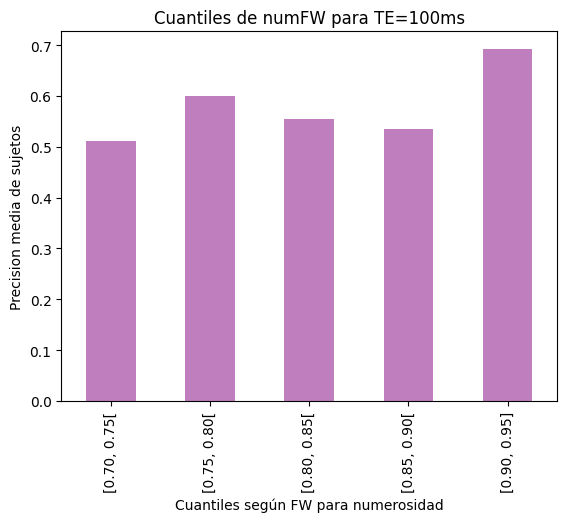

/tmp/ipykernel_76/58574589.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  a1 = data_c_100.groupby("decilnumFW")["response"].mean()


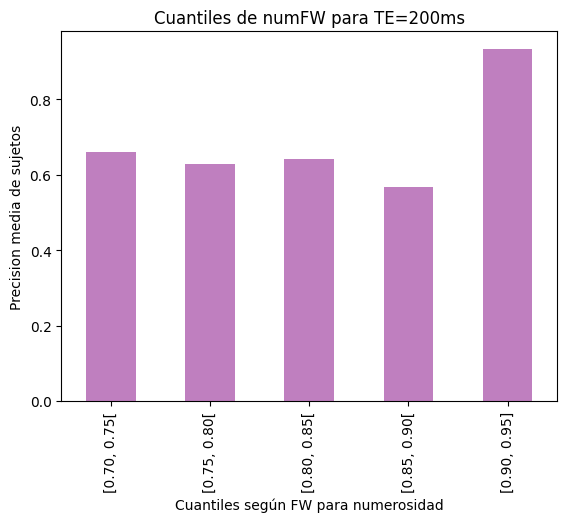

/tmp/ipykernel_76/58574589.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  a1 = data_c_100.groupby("decilnumFW")["response"].mean()


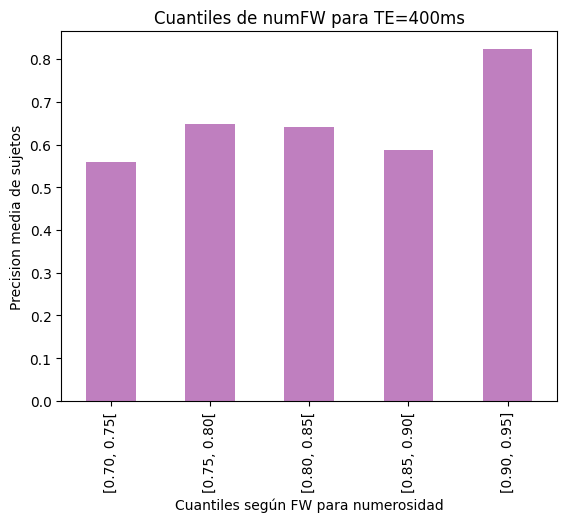

/tmp/ipykernel_76/58574589.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  a1 = data_c_100.groupby("decilnumFW")["response"].mean()


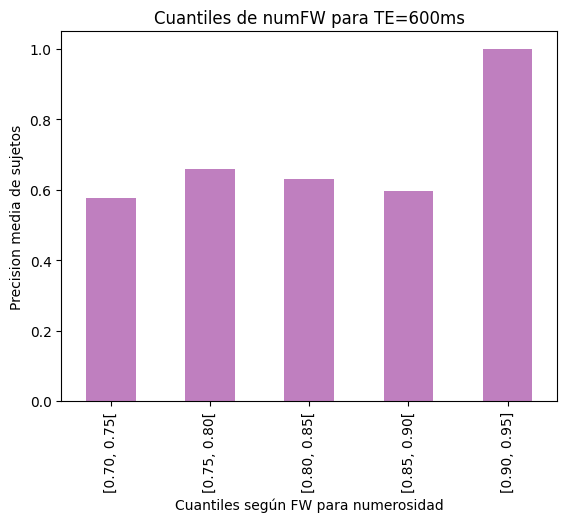

/tmp/ipykernel_76/58574589.py:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  a1 = data_c_100.groupby("decilnumFW")["response"].mean()


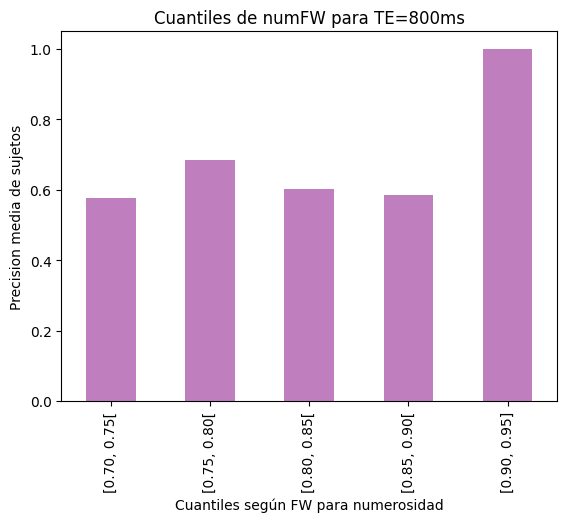

In [6]:
data_c_100 = data_c[(data_c["time"] == 100)]
a1 = data_c_100.groupby("decilnumFW")["response"].mean()
b1 = a1.dropna()
b1.plot(kind="bar", 
       alpha=0.5, 
       title="Cuantiles de numFW para TE=100ms",xlabel="Cuantiles según FW para numerosidad", ylabel="Precision media de sujetos",color="purple")
plt.show()
#plt.savefig("numfw_100ms.png")
data_c_100 = data_c[(data_c["time"] == 200)]
a1 = data_c_100.groupby("decilnumFW")["response"].mean()
b1 = a1.dropna()
b1.plot(kind="bar", 
       alpha=0.5, 
       title="Cuantiles de numFW para TE=200ms",xlabel="Cuantiles según FW para numerosidad", ylabel="Precision media de sujetos",color="purple")
plt.show()
#plt.savefig("numfw_200ms.png")

data_c_100 = data_c[(data_c["time"] == 400)]
a1 = data_c_100.groupby("decilnumFW")["response"].mean()
b1 = a1.dropna()
b1.plot(kind="bar", 
       alpha=0.5, 
       title="Cuantiles de numFW para TE=400ms",xlabel="Cuantiles según FW para numerosidad", ylabel="Precision media de sujetos",color="purple")
plt.show()
#plt.savefig("numfw_400ms.png")
data_c_100 = data_c[(data_c["time"] == 600)]
a1 = data_c_100.groupby("decilnumFW")["response"].mean()
b1 = a1.dropna()
b1.plot(kind="bar", 
       alpha=0.5, 
       title="Cuantiles de numFW para TE=600ms",xlabel="Cuantiles según FW para numerosidad", ylabel="Precision media de sujetos",color="purple")
plt.show()
#plt.savefig("numfw_600ms.png")
data_c_100 = data_c[(data_c["time"] == 800)]
a1 = data_c_100.groupby("decilnumFW")["response"].mean()
b1 = a1.dropna()
b1.plot(kind="bar", 
       alpha=0.5, 
       title="Cuantiles de numFW para TE=800ms",xlabel="Cuantiles según FW para numerosidad", ylabel="Precision media de sujetos",color="purple")
plt.show()      
#plt.savefig("numfw_800ms.png")


In [7]:
data_test1 = data_c[(data_c["time"] == 400) & (data_c["numFW"]>=0.90) & (data_c["numFW"]<0.95)& (data_c["envFW"]>=0.70) & (data_c["envFW"]<0.95)]
data_test1


# esto lo escribí para corroborar las altas medias de precisión en los FW mas altos, extrañamente

,Unnamed: 0,stim,subj_idx,trial,time,resp,rt,sesion,colAZ,colAM,...,pixAM,envAZ,envAM,response,numFW,pixFW,envFW,decilnumFW,decilpixFW,decilenvFW
4461,4462,stim_mix_154_AZ_AMmAZ_AMmmAZ_AZmmAM.png,i17,7,400,Z,322,s3,AZ2,AM1,...,6816,24155,19304,0.0,0.906977,0.796215,0.799172,"[0.90, 0.95]","[0.75, 0.80[","[0.75, 0.80["
4463,4464,stim_mix_154_AZ_AMmAZ_AMmmAZ_AZmmAM.png,i14,117,400,M,551,s4,AZ2,AM1,...,6816,24155,19304,1.0,0.906977,0.796215,0.799172,"[0.90, 0.95]","[0.75, 0.80[","[0.75, 0.80["
4470,4471,stim_mix_154_AZ_AMmAZ_AMmmAZ_AZmmAM.png,i4,190,400,M,616,s1,AZ2,AM1,...,6816,24155,19304,1.0,0.906977,0.796215,0.799172,"[0.90, 0.95]","[0.75, 0.80[","[0.75, 0.80["
4481,4482,stim_mix_154_AZ_AMmAZ_AMmmAZ_AZmmAM.png,i9,323,400,M,1327,s2,AZ2,AM1,...,6816,24155,19304,1.0,0.906977,0.796215,0.799172,"[0.90, 0.95]","[0.75, 0.80[","[0.75, 0.80["
4482,4483,stim_mix_154_AZ_AMmAZ_AMmmAZ_AZmmAM.png,i3,117,400,M,632,s4,AZ2,AM1,...,6816,24155,19304,1.0,0.906977,0.796215,0.799172,"[0.90, 0.95]","[0.75, 0.80[","[0.75, 0.80["
4491,4492,stim_mix_154_AZ_AMmAZ_AMmmAZ_AZmmAM.png,i2,266,400,M,775,s2,AZ2,AM1,...,6816,24155,19304,1.0,0.906977,0.796215,0.799172,"[0.90, 0.95]","[0.75, 0.80[","[0.75, 0.80["
4494,4495,stim_mix_154_AZ_AMmAZ_AMmmAZ_AZmmAM.png,i16,247,400,M,847,s1,AZ2,AM1,...,6816,24155,19304,1.0,0.906977,0.796215,0.799172,"[0.90, 0.95]","[0.75, 0.80[","[0.75, 0.80["
4497,4498,stim_mix_154_AZ_AMmAZ_AMmmAZ_AZmmAM.png,i17,247,400,Z,383,s2,AZ2,AM1,...,6816,24155,19304,0.0,0.906977,0.796215,0.799172,"[0.90, 0.95]","[0.75, 0.80[","[0.75, 0.80["
4498,4499,stim_mix_154_AZ_AMmAZ_AMmmAZ_AZmmAM.png,i20,266,400,M,689,s2,AZ2,AM1,...,6816,24155,19304,1.0,0.906977,0.796215,0.799172,"[0.90, 0.95]","[0.75, 0.80[","[0.75, 0.80["
4499,4500,stim_mix_154_AZ_AMmAZ_AMmmAZ_AZmmAM.png,i6,190,400,M,564,s1,AZ2,AM1,...,6816,24155,19304,1.0,0.906977,0.796215,0.799172,"[0.90, 0.95]","[0.75, 0.80[","[0.75, 0.80["


/tmp/ipykernel_76/2652898144.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  a = data.groupby("decilnumFW")["response"].mean()


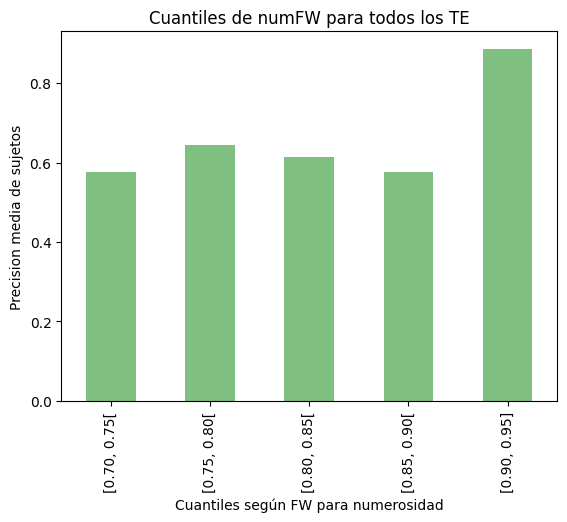

In [8]:
## Gráfico FW vs Precisión SIN SEPARAR POR TE
a = data.groupby("decilnumFW")["response"].mean()
b = a.dropna()
b.plot(kind="bar", 
       alpha=0.5, 
       title="Cuantiles de numFW para todos los TE",xlabel="Cuantiles según FW para numerosidad", ylabel="Precision media de sujetos",color="green")
plt.savefig("numfw_todos.png")

/tmp/ipykernel_76/115733514.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  c1 = data_c_100.groupby("decilpixFW")["response"].mean()


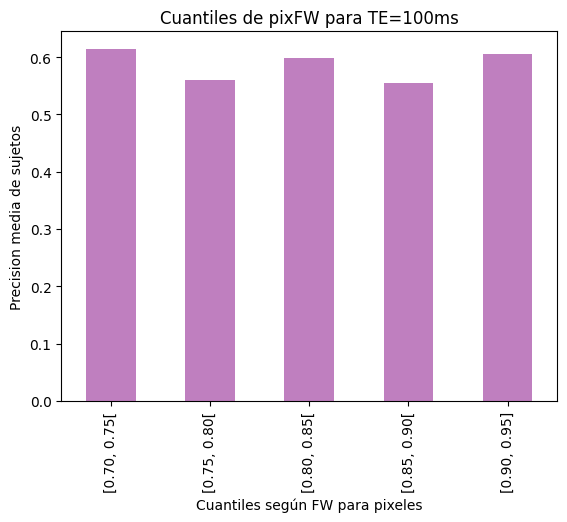

/tmp/ipykernel_76/115733514.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  c1 = data_c_100.groupby("decilpixFW")["response"].mean()


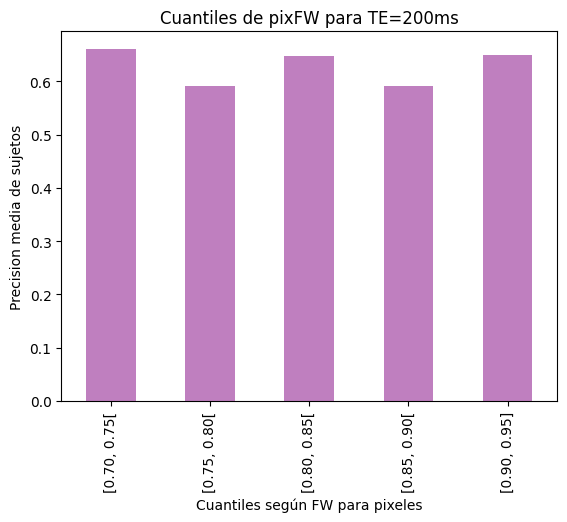

/tmp/ipykernel_76/115733514.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  c1 = data_c_100.groupby("decilpixFW")["response"].mean()


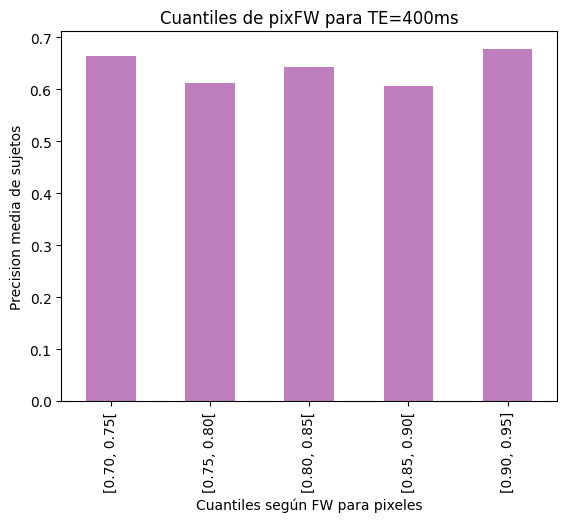

/tmp/ipykernel_76/115733514.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  c1 = data_c_100.groupby("decilpixFW")["response"].mean()


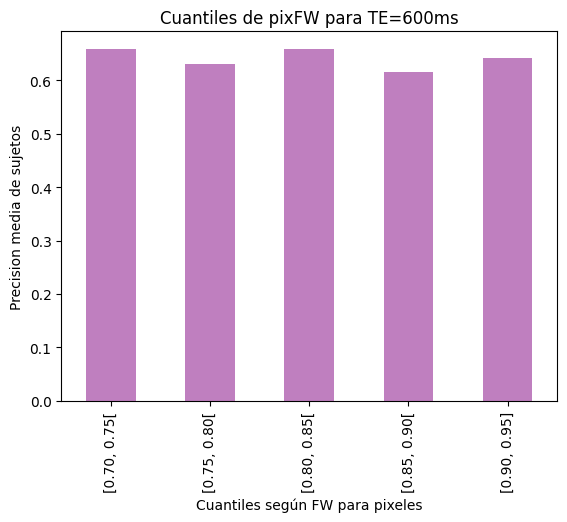

/tmp/ipykernel_76/115733514.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  c1 = data_c_100.groupby("decilpixFW")["response"].mean()


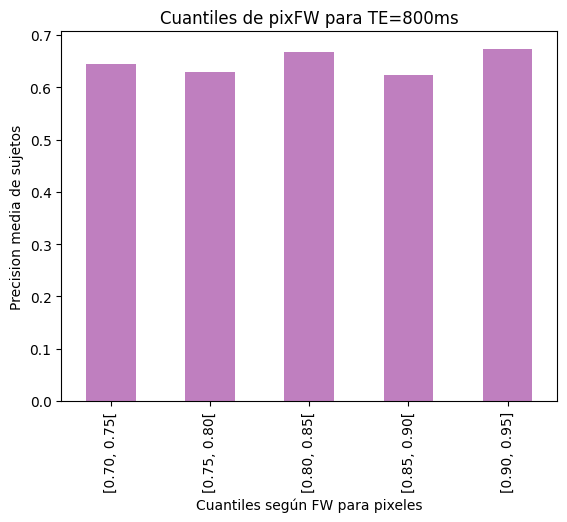

In [9]:
## Gráfico FW PIX vs Precisión 100 MS

data_c_100 = data_c[(data_c["time"] == 100)]
c1 = data_c_100.groupby("decilpixFW")["response"].mean()
d1 = c1.dropna()
d1.plot(kind="bar", 
       alpha=0.5, 
       title="Cuantiles de pixFW para TE=100ms",xlabel="Cuantiles según FW para pixeles", ylabel="Precision media de sujetos",color="purple")
plt.show()

data_c_100 = data_c[(data_c["time"] == 200)]
c1 = data_c_100.groupby("decilpixFW")["response"].mean()
d1 = c1.dropna()
d1.plot(kind="bar", 
       alpha=0.5, 
       title="Cuantiles de pixFW para TE=200ms",xlabel="Cuantiles según FW para pixeles", ylabel="Precision media de sujetos",color="purple")
plt.show()

data_c_100 = data_c[(data_c["time"] == 400)]
c1 = data_c_100.groupby("decilpixFW")["response"].mean()
d1 = c1.dropna()
d1.plot(kind="bar", 
       alpha=0.5, 
       title="Cuantiles de pixFW para TE=400ms",xlabel="Cuantiles según FW para pixeles", ylabel="Precision media de sujetos",color="purple")
plt.show()

data_c_100 = data_c[(data_c["time"] == 600)]
c1 = data_c_100.groupby("decilpixFW")["response"].mean()
d1 = c1.dropna()
d1.plot(kind="bar", 
       alpha=0.5, 
       title="Cuantiles de pixFW para TE=600ms",xlabel="Cuantiles según FW para pixeles", ylabel="Precision media de sujetos",color="purple")
plt.show()

data_c_100 = data_c[(data_c["time"] == 800)]
c1 = data_c_100.groupby("decilpixFW")["response"].mean()
d1 = c1.dropna()
d1.plot(kind="bar", 
       alpha=0.5, 
       title="Cuantiles de pixFW para TE=800ms",xlabel="Cuantiles según FW para pixeles", ylabel="Precision media de sujetos",color="purple")
plt.show()

/tmp/ipykernel_76/117738378.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  c = data_c.groupby("decilpixFW")["response"].mean()


<AxesSubplot: title={'center': 'Cuantiles de pixFW para todos los TE'}, xlabel='Cuantiles según FW para pixeles', ylabel='Precision media de sujetos'>

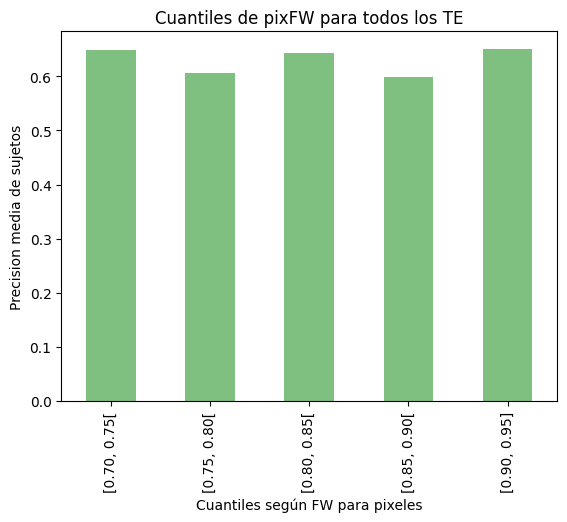

In [10]:
## Gráfico FWPIX vs Precisión SIN SEPARAR POR TE

c = data_c.groupby("decilpixFW")["response"].mean()
d = c.dropna()
d.plot(kind="bar", 
       alpha=0.5, 
       title="Cuantiles de pixFW para todos los TE",xlabel="Cuantiles según FW para pixeles", ylabel="Precision media de sujetos",color="green")

/tmp/ipykernel_76/1107605892.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  c1 = data_c_100.groupby("decilenvFW")["response"].mean()


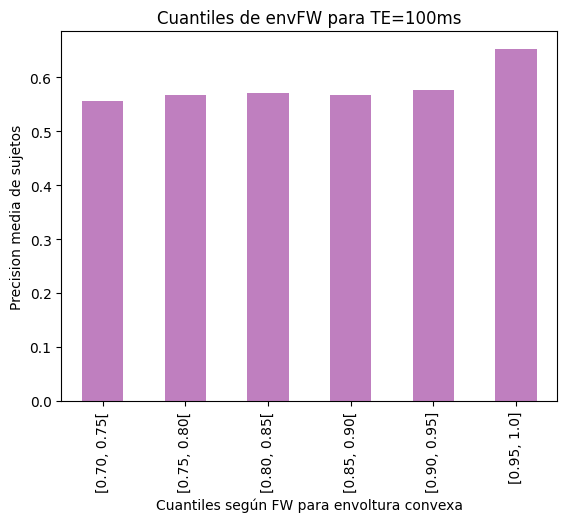

/tmp/ipykernel_76/1107605892.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  c1 = data_c_100.groupby("decilenvFW")["response"].mean()


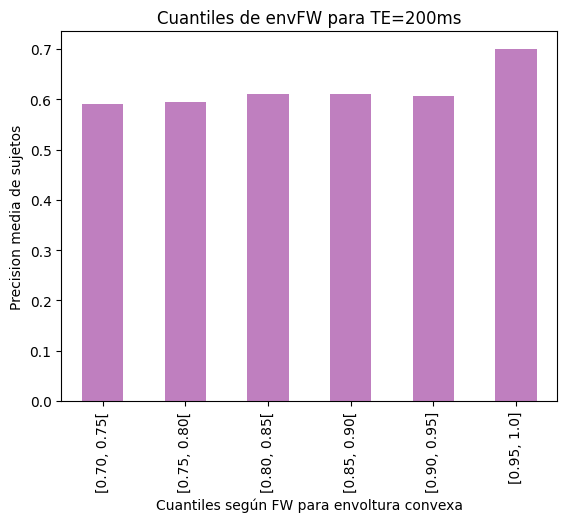

/tmp/ipykernel_76/1107605892.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  c1 = data_c_100.groupby("decilenvFW")["response"].mean()


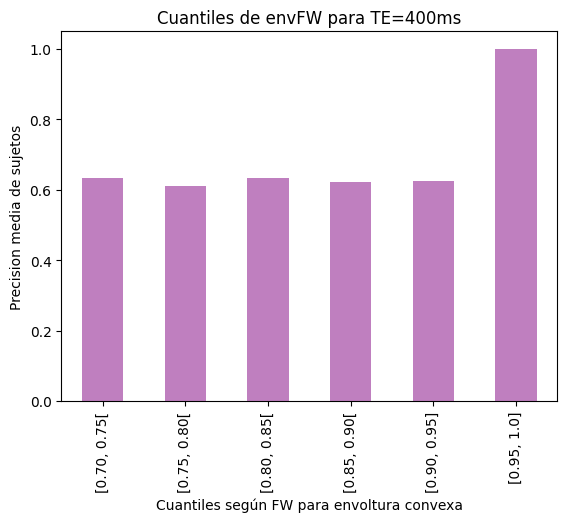

/tmp/ipykernel_76/1107605892.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  c1 = data_c_100.groupby("decilenvFW")["response"].mean()


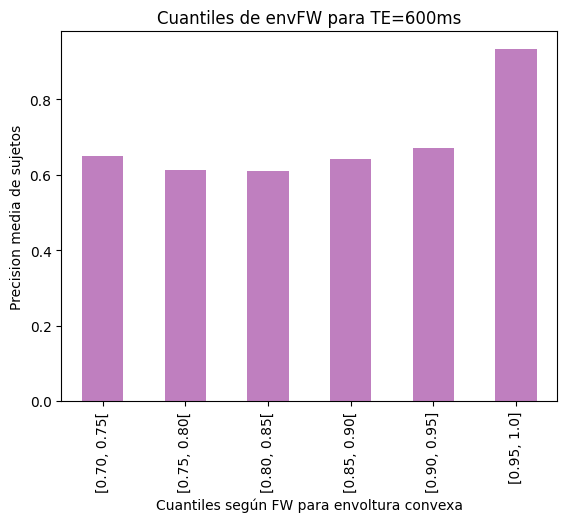

/tmp/ipykernel_76/1107605892.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  c1 = data_c_100.groupby("decilenvFW")["response"].mean()


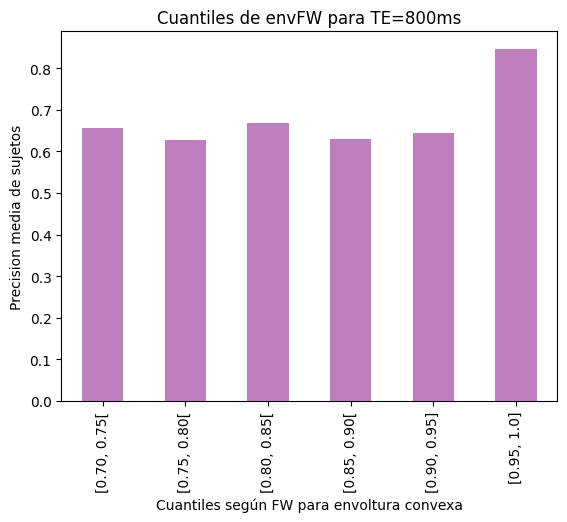

In [11]:
## Gráfico FW PIX vs Precisión 100 MS

data_c_100 = data_c[(data_c["time"] == 100)]
c1 = data_c_100.groupby("decilenvFW")["response"].mean()
d1 = c1.dropna()
d1.plot(kind="bar", 
       alpha=0.5, 
       title="Cuantiles de envFW para TE=100ms",xlabel="Cuantiles según FW para envoltura convexa", ylabel="Precision media de sujetos",color="purple")
plt.show()

data_c_100 = data_c[(data_c["time"] == 200)]
c1 = data_c_100.groupby("decilenvFW")["response"].mean()
d1 = c1.dropna()
d1.plot(kind="bar", 
       alpha=0.5, 
       title="Cuantiles de envFW para TE=200ms",xlabel="Cuantiles según FW para envoltura convexa", ylabel="Precision media de sujetos",color="purple")
plt.show()

data_c_100 = data_c[(data_c["time"] == 400)]
c1 = data_c_100.groupby("decilenvFW")["response"].mean()
d1 = c1.dropna()
d1.plot(kind="bar", 
       alpha=0.5, 
       title="Cuantiles de envFW para TE=400ms",xlabel="Cuantiles según FW para envoltura convexa", ylabel="Precision media de sujetos",color="purple")
plt.show()

data_c_100 = data_c[(data_c["time"] == 600)]
c1 = data_c_100.groupby("decilenvFW")["response"].mean()
d1 = c1.dropna()
d1.plot(kind="bar", 
       alpha=0.5, 
       title="Cuantiles de envFW para TE=600ms",xlabel="Cuantiles según FW para envoltura convexa", ylabel="Precision media de sujetos",color="purple")
plt.show()

data_c_100 = data_c[(data_c["time"] == 800)]
c1 = data_c_100.groupby("decilenvFW")["response"].mean()
d1 = c1.dropna()
d1.plot(kind="bar", 
       alpha=0.5, 
       title="Cuantiles de envFW para TE=800ms",xlabel="Cuantiles según FW para envoltura convexa", ylabel="Precision media de sujetos",color="purple")
plt.show()

/tmp/ipykernel_76/3071214470.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  c = data_c.groupby("decilenvFW")["response"].mean()


<AxesSubplot: title={'center': 'Cuantiles de envFW para todos los TE'}, xlabel='Cuantiles según FW para envoltura convexa', ylabel='Precision media de sujetos'>

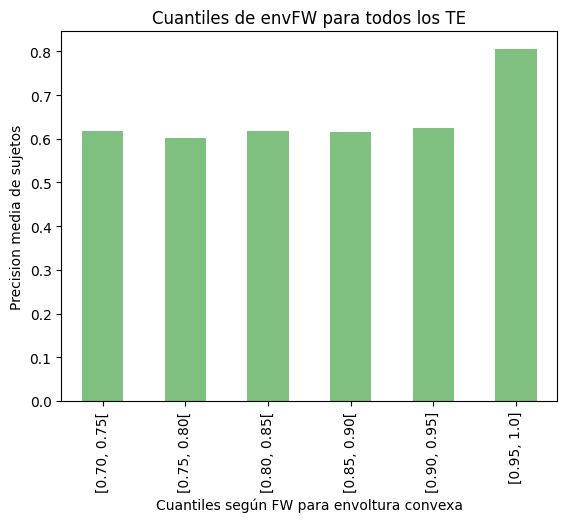

In [12]:
## Gráfico FWPIX vs Precisión SIN SEPARAR POR TE

c = data_c.groupby("decilenvFW")["response"].mean()
d = c.dropna()
d.plot(kind="bar", 
       alpha=0.5, 
       title="Cuantiles de envFW para todos los TE",xlabel="Cuantiles según FW para envoltura convexa", ylabel="Precision media de sujetos",color="green")

In [13]:
data_test1 = data_c[ (data_c["envFW"]>=0.95) & (data_c["envFW"]<=1.0)& (data_c["numFW"]>=0.85) & (data_c["numFW"]<0.95)]
data_test1

,Unnamed: 0,stim,subj_idx,trial,time,resp,rt,sesion,colAZ,colAM,...,pixAM,envAZ,envAM,response,numFW,pixFW,envFW,decilnumFW,decilpixFW,decilenvFW
3949,3950,stim_mix_148_AZ_AMmAZ_AMmmAZ_AZmAM.png,i18,198,600,M,657,s4,AZ2,AM2,...,20152,70713,67793,1.0,0.875,0.767368,0.958706,"[0.85, 0.90[","[0.75, 0.80[","[0.95, 1.0]"
3950,3951,stim_mix_148_AZ_AMmAZ_AMmmAZ_AZmAM.png,i10,56,400,M,716,s2,AZ2,AM2,...,20152,70713,67793,1.0,0.875,0.767368,0.958706,"[0.85, 0.90[","[0.75, 0.80[","[0.95, 1.0]"
3951,3952,stim_mix_148_AZ_AMmAZ_AMmmAZ_AZmAM.png,i10,457,600,Z,482,s4,AZ2,AM2,...,20152,70713,67793,0.0,0.875,0.767368,0.958706,"[0.85, 0.90[","[0.75, 0.80[","[0.95, 1.0]"
3952,3953,stim_mix_148_AZ_AMmAZ_AMmmAZ_AZmAM.png,i8,76,100,M,812,s1,AZ2,AM2,...,20152,70713,67793,1.0,0.875,0.767368,0.958706,"[0.85, 0.90[","[0.75, 0.80[","[0.95, 1.0]"
3953,3954,stim_mix_148_AZ_AMmAZ_AMmmAZ_AZmAM.png,i20,268,400,M,692,s3,AZ2,AM2,...,20152,70713,67793,1.0,0.875,0.767368,0.958706,"[0.85, 0.90[","[0.75, 0.80[","[0.95, 1.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4017,4018,stim_mix_148_AZ_AMmAZ_AMmmAZ_AZmAM.png,i18,437,100,M,566,s1,AZ2,AM2,...,20152,70713,67793,1.0,0.875,0.767368,0.958706,"[0.85, 0.90[","[0.75, 0.80[","[0.95, 1.0]"
4018,4019,stim_mix_148_AZ_AMmAZ_AMmmAZ_AZmAM.png,i2,198,400,M,681,s2,AZ2,AM2,...,20152,70713,67793,1.0,0.875,0.767368,0.958706,"[0.85, 0.90[","[0.75, 0.80[","[0.95, 1.0]"
4019,4020,stim_mix_148_AZ_AMmAZ_AMmmAZ_AZmAM.png,i7,437,800,M,696,s2,AZ2,AM2,...,20152,70713,67793,1.0,0.875,0.767368,0.958706,"[0.85, 0.90[","[0.75, 0.80[","[0.95, 1.0]"
4020,4021,stim_mix_148_AZ_AMmAZ_AMmmAZ_AZmAM.png,i19,245,100,M,504,s1,AZ2,AM2,...,20152,70713,67793,1.0,0.875,0.767368,0.958706,"[0.85, 0.90[","[0.75, 0.80[","[0.95, 1.0]"


## GRÁFICOS PRECISIÓN VS RT MEDIO

### Notar que estos son los gráficos que se tratan en el paper presentado.

### Además, los grafico por TE puesto que al tener distintos TE y umbrales para droppear según RT, es necesario separarlos para distinguir que es distinto responder por ej, con RT 500 en TE100ms y RT 500 en TE800ms

In [14]:
data=data_c

In [15]:
## creación de los cuantiles para tiempo de respuesta

bins = [0, 75, 150, 225, 300, 375, 450, 525, 600, 675, 750, 825, 900, 975, 
 1050, 1125, 1200, 1275, 1350, 1425, 1500, 1575, 1650, 1725, 1800]

data["cuantRT"] = pd.cut(data["rt"], 
                         bins=bins, 
                         right=False, # El intervalo es abierto por la derecha
                         labels=['[0, 75[', '[75, 150[', '[150, 225[', '[225, 300[', '[300, 375[', '[375, 450[', 
 '[450, 525[', '[525, 600[', '[600, 675[', '[675, 750[', '[750, 825[', '[825, 900[', 
 '[900, 975[', '[975, 1050[', '[1050, 1125[', '[1125, 1200[', '[1200, 1275[', 
 '[1275, 1350[', '[1350, 1425[', '[1425, 1500[', '[1500, 1575[', '[1575, 1650[', 
 '[1650, 1725[', '[1725, 1800[']  ) 
                                

/tmp/ipykernel_76/1486395183.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  p1 = data100.groupby("cuantRT")["response"].mean()


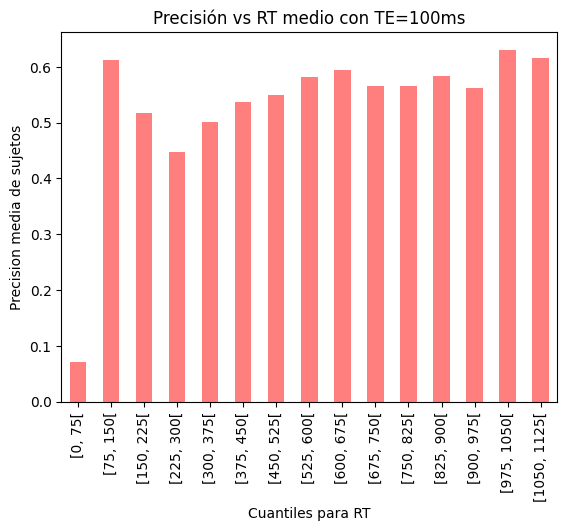

/tmp/ipykernel_76/1486395183.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  p1 = data100.groupby("cuantRT")["response"].mean()


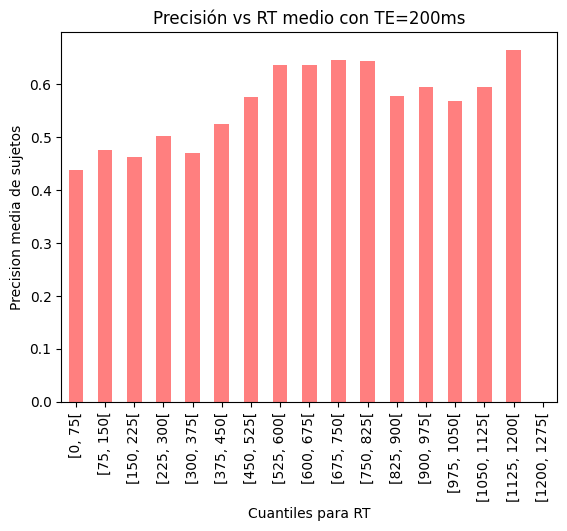

/tmp/ipykernel_76/1486395183.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  p1 = data100.groupby("cuantRT")["response"].mean()


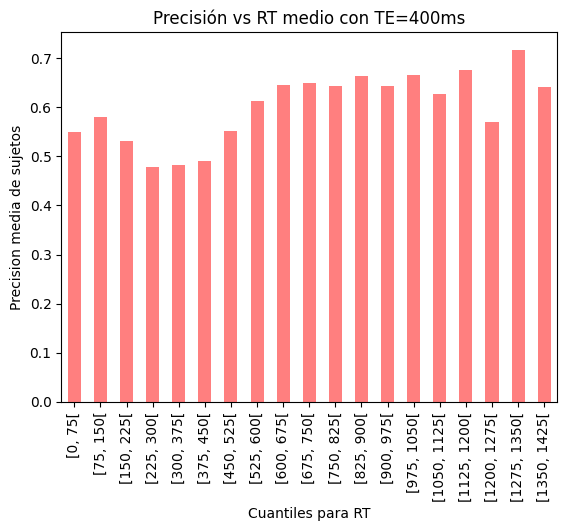

/tmp/ipykernel_76/1486395183.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  p1 = data100.groupby("cuantRT")["response"].mean()


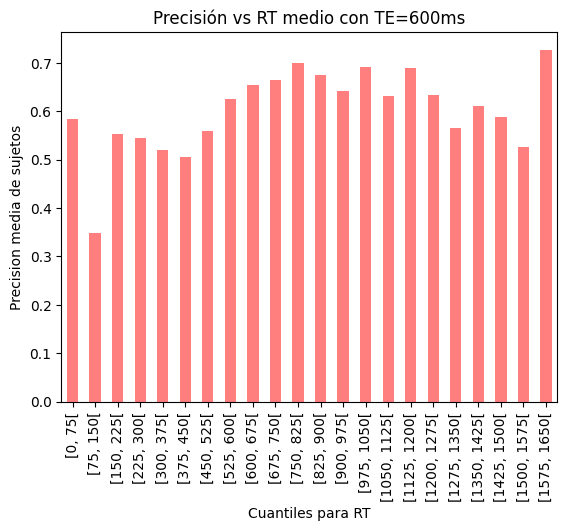

/tmp/ipykernel_76/1486395183.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  p1 = data100.groupby("cuantRT")["response"].mean()


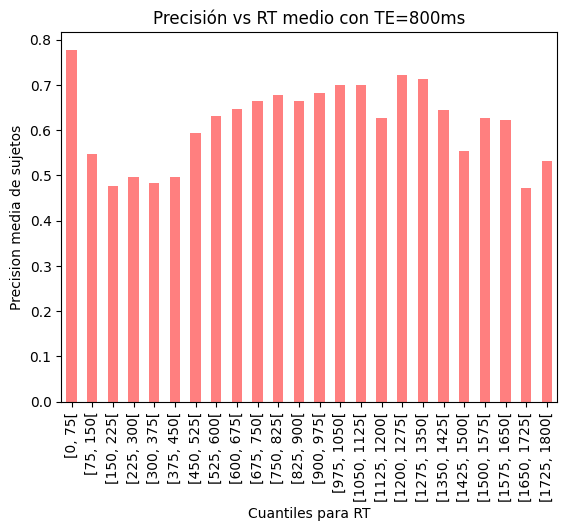

/tmp/ipykernel_76/1486395183.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  p1 = data.groupby("cuantRT")["response"].mean()


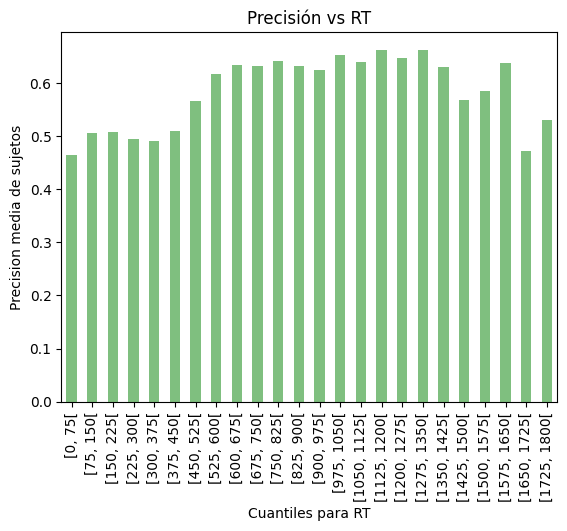

In [16]:
data100=data[(data["time"] == 100)]
p1 = data100.groupby("cuantRT")["response"].mean()
p1 = p1.dropna()
p1.plot(kind="bar", 
       alpha=0.5, 
       title="Precisión vs RT medio con TE=100ms",xlabel="Cuantiles para RT", ylabel="Precision media de sujetos",color="red")
plt.show()
data100=data[(data["time"] == 200)]
p1 = data100.groupby("cuantRT")["response"].mean()
p1 = p1.dropna()
p1.plot(kind="bar", 
       alpha=0.5, 
       title="Precisión vs RT medio con TE=200ms",xlabel="Cuantiles para RT", ylabel="Precision media de sujetos",color="red")
plt.show()
data100=data[(data["time"] == 400)]
p1 = data100.groupby("cuantRT")["response"].mean()
p1 = p1.dropna()
p1.plot(kind="bar", 
       alpha=0.5, 
       title="Precisión vs RT medio con TE=400ms",xlabel="Cuantiles para RT", ylabel="Precision media de sujetos",color="red")
plt.show()
data100=data[(data["time"] == 600)]
p1 = data100.groupby("cuantRT")["response"].mean()
p1 = p1.dropna()
p1.plot(kind="bar", 
       alpha=0.5, 
       title="Precisión vs RT medio con TE=600ms",xlabel="Cuantiles para RT", ylabel="Precision media de sujetos",color="red")
plt.show()
data100=data[(data["time"] == 800)]
p1 = data100.groupby("cuantRT")["response"].mean()
p1 = p1.dropna()
p1.plot(kind="bar", 
       alpha=0.5, 
       title="Precisión vs RT medio con TE=800ms",xlabel="Cuantiles para RT", ylabel="Precision media de sujetos",color="red")
plt.show()
p1 = data.groupby("cuantRT")["response"].mean()
p1 = p1.dropna()
p1.plot(kind="bar", 
       alpha=0.5, 
       title="Precisión vs RT",xlabel="Cuantiles para RT", ylabel="Precision media de sujetos",color="green")
plt.show()

### GRÁFICOS FW VS RT

### FW según envoltura convexa vs RT medio

/tmp/ipykernel_76/2864325174.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  p1 = data100.groupby("decilenvFW")["rt"].mean()


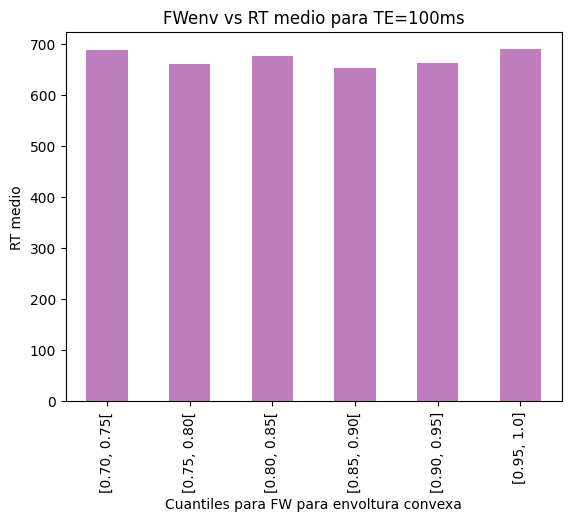

/tmp/ipykernel_76/2864325174.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  p1 = data200.groupby("decilenvFW")["rt"].mean()


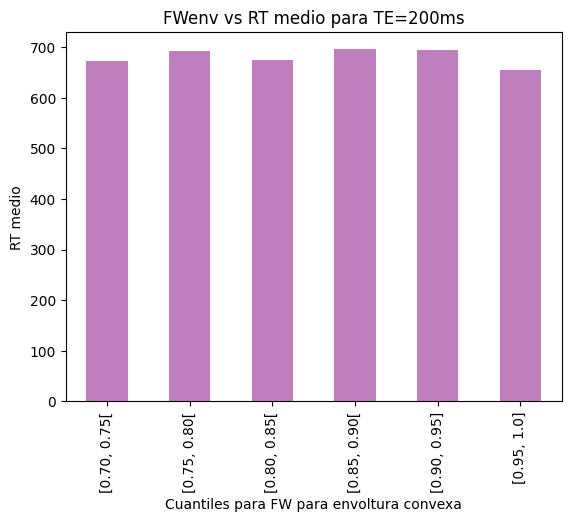

/tmp/ipykernel_76/2864325174.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  p1 = data400.groupby("decilenvFW")["rt"].mean()


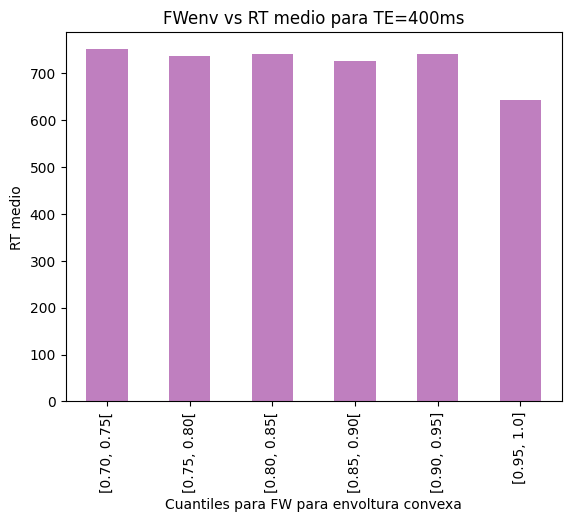

/tmp/ipykernel_76/2864325174.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  p1 = data600.groupby("decilenvFW")["rt"].mean()


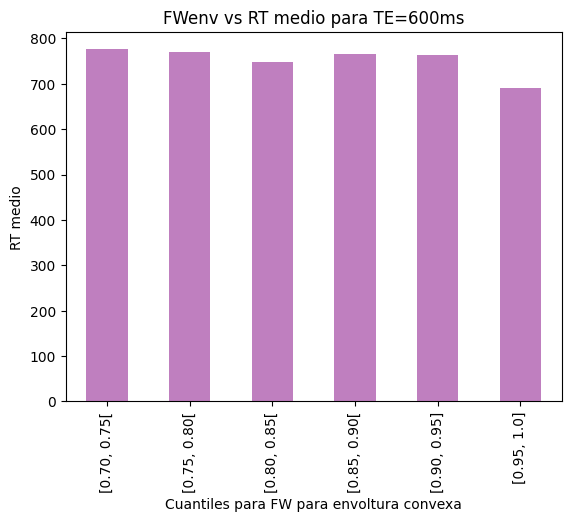

/tmp/ipykernel_76/2864325174.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  p1 = data800.groupby("decilenvFW")["rt"].mean()


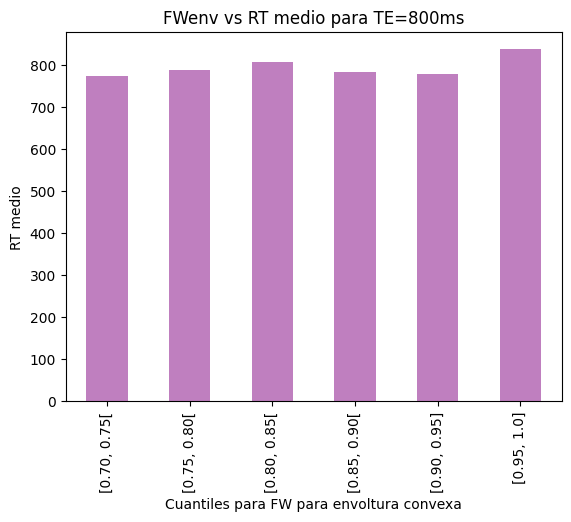

In [17]:
data100=data[(data["time"] == 100)]
p1 = data100.groupby("decilenvFW")["rt"].mean()
p1 = p1.dropna()
p1.plot(kind="bar", 
       alpha=0.5, 
       title="FWenv vs RT medio para TE=100ms",xlabel="Cuantiles para FW para envoltura convexa", ylabel="RT medio",color="purple")
plt.show()

data200=data[(data["time"] == 200)]
p1 = data200.groupby("decilenvFW")["rt"].mean()
p1 = p1.dropna()
p1.plot(kind="bar", 
       alpha=0.5, 
       title="FWenv vs RT medio para TE=200ms",xlabel="Cuantiles para FW para envoltura convexa", ylabel="RT medio",color="purple")
plt.show()
       
data400=data[(data["time"] == 400)]
p1 = data400.groupby("decilenvFW")["rt"].mean()
p1 = p1.dropna()
p1.plot(kind="bar", 
       alpha=0.5, 
       title="FWenv vs RT medio para TE=400ms",xlabel="Cuantiles para FW para envoltura convexa", ylabel="RT medio",color="purple")
plt.show()

data600=data[(data["time"] == 600)]
p1 = data600.groupby("decilenvFW")["rt"].mean()
p1 = p1.dropna()
p1.plot(kind="bar", 
       alpha=0.5, 
       title="FWenv vs RT medio para TE=600ms",xlabel="Cuantiles para FW para envoltura convexa", ylabel="RT medio",color="purple")
plt.show()

data800=data[(data["time"] == 800)]
p1 = data800.groupby("decilenvFW")["rt"].mean()
p1 = p1.dropna()
p1.plot(kind="bar", 
       alpha=0.5, 
       title="FWenv vs RT medio para TE=800ms",xlabel="Cuantiles para FW para envoltura convexa", ylabel="RT medio",color="purple")
plt.show()


/tmp/ipykernel_76/922683133.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  p1 = data.groupby("decilenvFW")["rt"].mean()


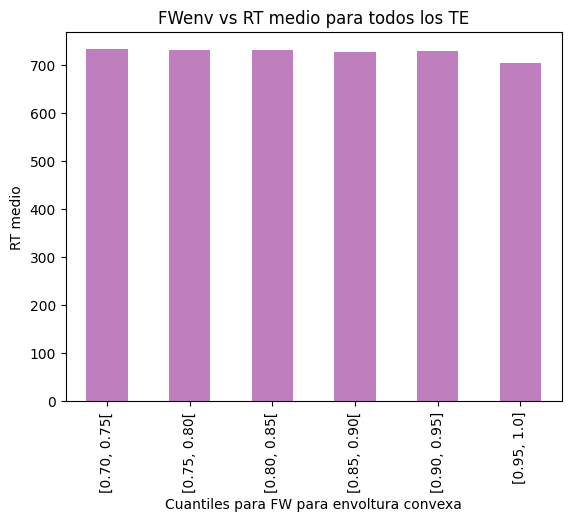

In [18]:
p1 = data.groupby("decilenvFW")["rt"].mean()
p1 = p1.dropna()
p1.plot(kind="bar", 
       alpha=0.5, 
       title="FWenv vs RT medio para todos los TE",xlabel="Cuantiles para FW para envoltura convexa", ylabel="RT medio",color="purple")
plt.show()

### FW por numerosidad vs RT medio

/tmp/ipykernel_76/1982283580.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  p1 = data100.groupby("decilnumFW")["rt"].mean()


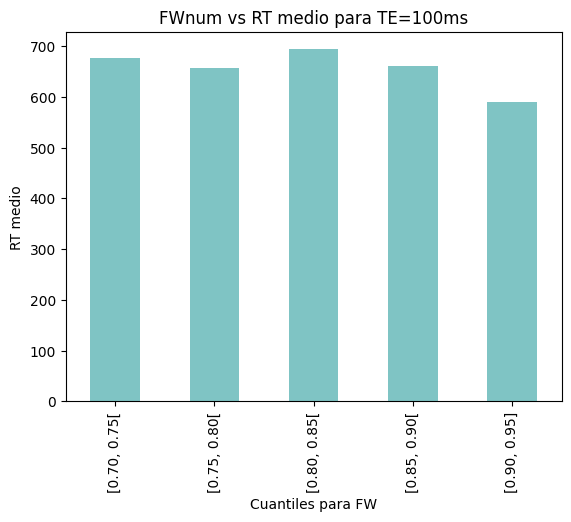

/tmp/ipykernel_76/1982283580.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  p1 = data200.groupby("decilnumFW")["rt"].mean()


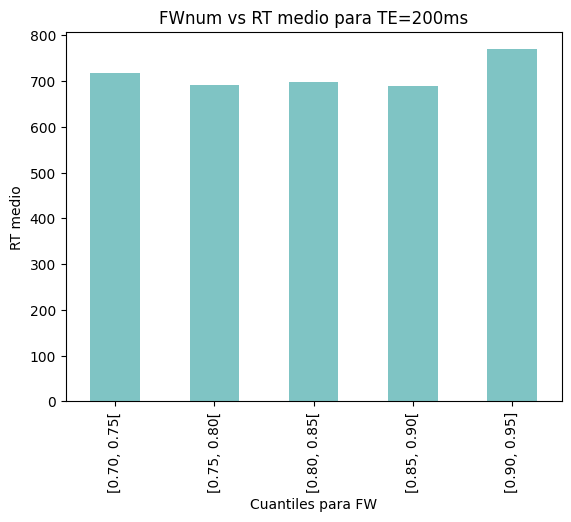

/tmp/ipykernel_76/1982283580.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  p1 = data400.groupby("decilnumFW")["rt"].mean()


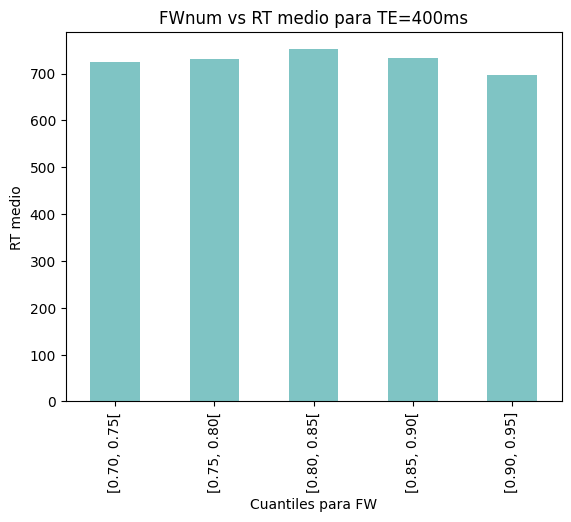

/tmp/ipykernel_76/1982283580.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  p1 = data600.groupby("decilnumFW")["rt"].mean()


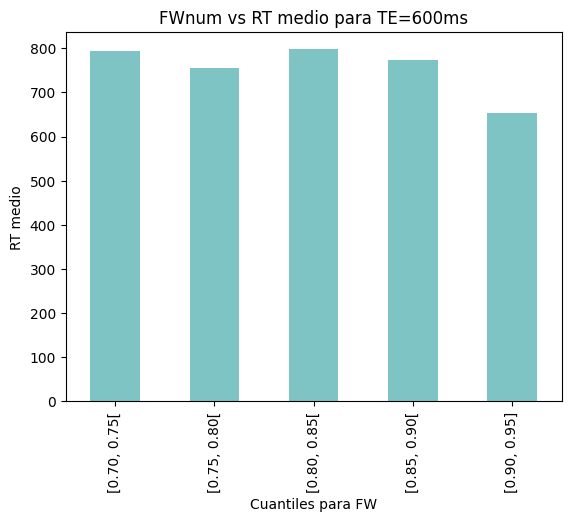

/tmp/ipykernel_76/1982283580.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  p1 = data800.groupby("decilnumFW")["rt"].mean()


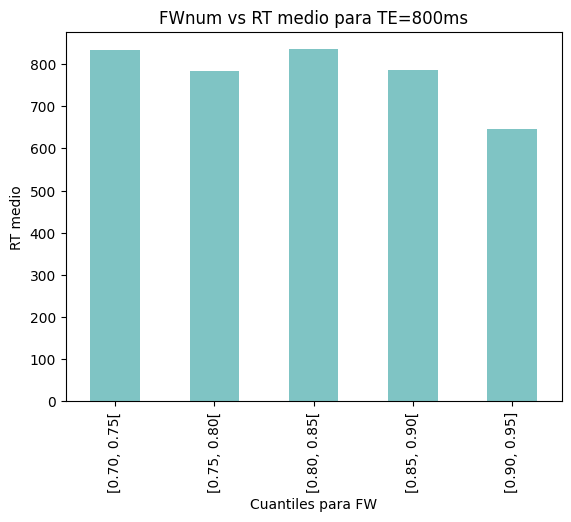

/tmp/ipykernel_76/1982283580.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  p1 = data.groupby("decilnumFW")["rt"].mean()


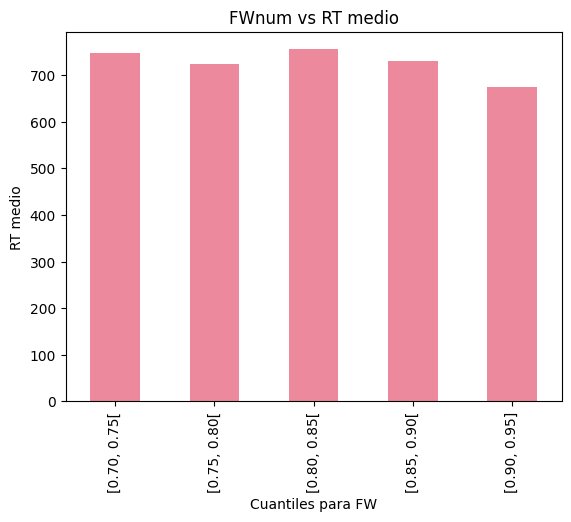

In [20]:
data100=data[(data["time"] == 100)]
p1 = data100.groupby("decilnumFW")["rt"].mean()
p1 = p1.dropna()
p1.plot(kind="bar", 
       alpha=0.5, 
       title="FWnum vs RT medio para TE=100ms",xlabel="Cuantiles para FW", ylabel="RT medio",color="darkcyan")
plt.show()

data200=data[(data["time"] == 200)]
p1 = data200.groupby("decilnumFW")["rt"].mean()
p1 = p1.dropna()
p1.plot(kind="bar", 
       alpha=0.5, 
       title="FWnum vs RT medio para TE=200ms",xlabel="Cuantiles para FW", ylabel="RT medio",color="darkcyan")
plt.show()
       
data400=data[(data["time"] == 400)]
p1 = data400.groupby("decilnumFW")["rt"].mean()
p1 = p1.dropna()
p1.plot(kind="bar", 
       alpha=0.5, 
       title="FWnum vs RT medio para TE=400ms",xlabel="Cuantiles para FW", ylabel="RT medio",color="darkcyan")
plt.show()

data600=data[(data["time"] == 600)]
p1 = data600.groupby("decilnumFW")["rt"].mean()
p1 = p1.dropna()
p1.plot(kind="bar", 
       alpha=0.5, 
       title="FWnum vs RT medio para TE=600ms",xlabel="Cuantiles para FW", ylabel="RT medio",color="darkcyan")
plt.show()

data800=data[(data["time"] == 800)]
p1 = data800.groupby("decilnumFW")["rt"].mean()
p1 = p1.dropna()
p1.plot(kind="bar", 
       alpha=0.5, 
       title="FWnum vs RT medio para TE=800ms",xlabel="Cuantiles para FW", ylabel="RT medio",color="darkcyan")
plt.show()

p1 = data.groupby("decilnumFW")["rt"].mean()
p1 = p1.dropna()
p1.plot(kind="bar", 
       alpha=0.5, 
       title="FWnum vs RT medio",xlabel="Cuantiles para FW", ylabel="RT medio",color="crimson")
plt.show()

/tmp/ipykernel_76/645890862.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  p1 = data100.groupby("decilpixFW")["rt"].mean()


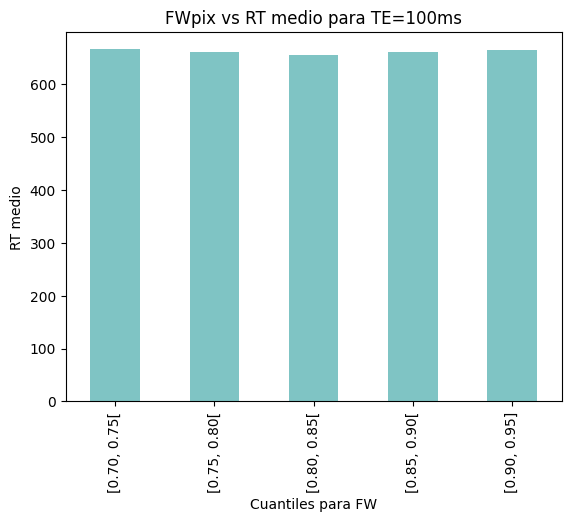

/tmp/ipykernel_76/645890862.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  p1 = data200.groupby("decilpixFW")["rt"].mean()


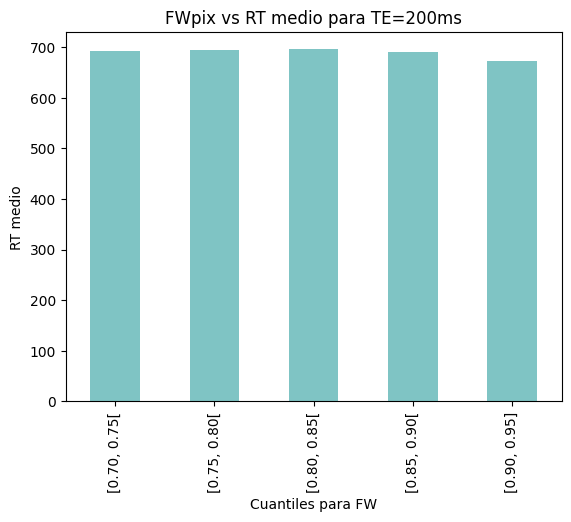

/tmp/ipykernel_76/645890862.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  p1 = data400.groupby("decilpixFW")["rt"].mean()


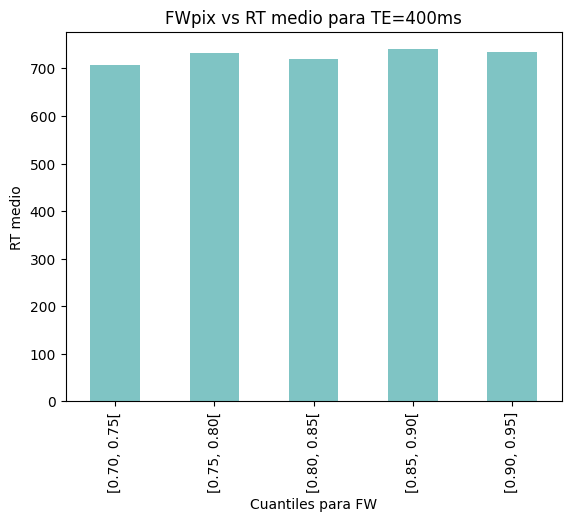

/tmp/ipykernel_76/645890862.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  p1 = data600.groupby("decilpixFW")["rt"].mean()


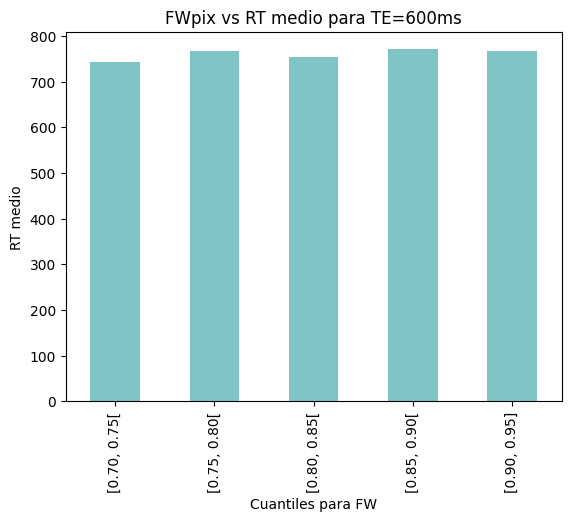

/tmp/ipykernel_76/645890862.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  p1 = data800.groupby("decilpixFW")["rt"].mean()


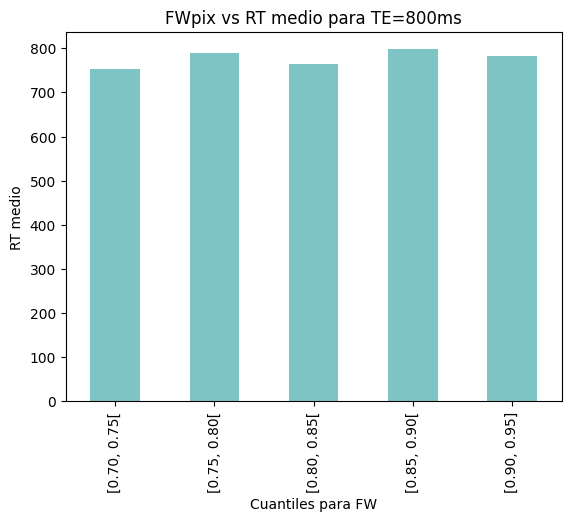

/tmp/ipykernel_76/645890862.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  p1 = data.groupby("decilpixFW")["rt"].mean()


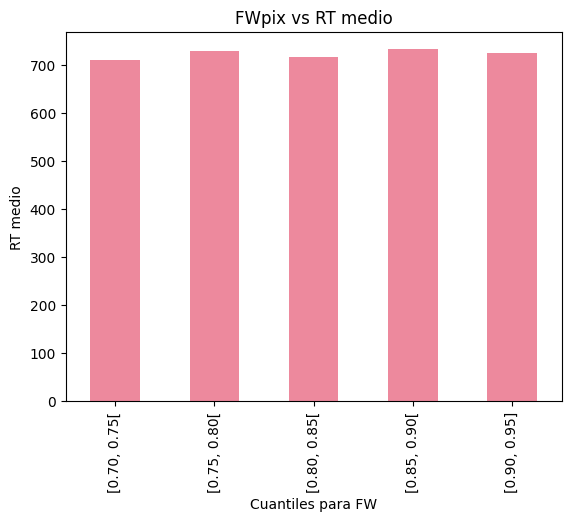

In [21]:
data100=data[(data["time"] == 100)]
p1 = data100.groupby("decilpixFW")["rt"].mean()
p1 = p1.dropna()
p1.plot(kind="bar", 
       alpha=0.5, 
       title="FWpix vs RT medio para TE=100ms",xlabel="Cuantiles para FW", ylabel="RT medio",color="darkcyan")
plt.show()

data200=data[(data["time"] == 200)]
p1 = data200.groupby("decilpixFW")["rt"].mean()
p1 = p1.dropna()
p1.plot(kind="bar", 
       alpha=0.5, 
       title="FWpix vs RT medio para TE=200ms",xlabel="Cuantiles para FW", ylabel="RT medio",color="darkcyan")
plt.show()
       
data400=data[(data["time"] == 400)]
p1 = data400.groupby("decilpixFW")["rt"].mean()
p1 = p1.dropna()
p1.plot(kind="bar", 
       alpha=0.5, 
       title="FWpix vs RT medio para TE=400ms",xlabel="Cuantiles para FW", ylabel="RT medio",color="darkcyan")
plt.show()

data600=data[(data["time"] == 600)]
p1 = data600.groupby("decilpixFW")["rt"].mean()
p1 = p1.dropna()
p1.plot(kind="bar", 
       alpha=0.5, 
       title="FWpix vs RT medio para TE=600ms",xlabel="Cuantiles para FW", ylabel="RT medio",color="darkcyan")
plt.show()

data800=data[(data["time"] == 800)]
p1 = data800.groupby("decilpixFW")["rt"].mean()
p1 = p1.dropna()
p1.plot(kind="bar", 
       alpha=0.5, 
       title="FWpix vs RT medio para TE=800ms",xlabel="Cuantiles para FW", ylabel="RT medio",color="darkcyan")
plt.show()

p1 = data.groupby("decilpixFW")["rt"].mean()
p1 = p1.dropna()
p1.plot(kind="bar", 
       alpha=0.5, 
       title="FWpix vs RT medio",xlabel="Cuantiles para FW", ylabel="RT medio",color="crimson")
plt.show()

/tmp/ipykernel_76/989339531.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  p1 = data100.groupby("decilenvFW")["rt"].mean()


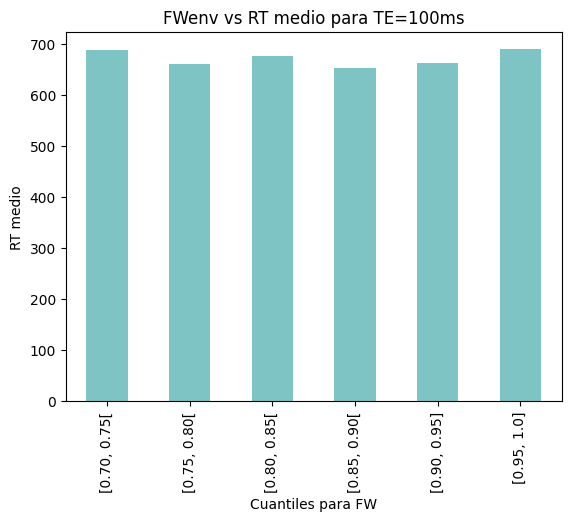

/tmp/ipykernel_76/989339531.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  p1 = data200.groupby("decilenvFW")["rt"].mean()


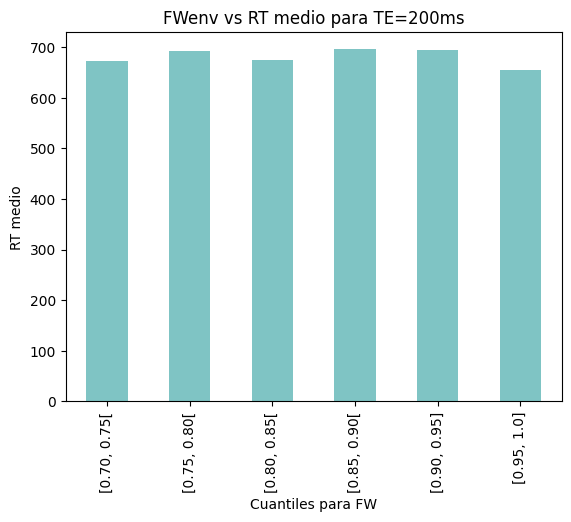

/tmp/ipykernel_76/989339531.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  p1 = data400.groupby("decilenvFW")["rt"].mean()


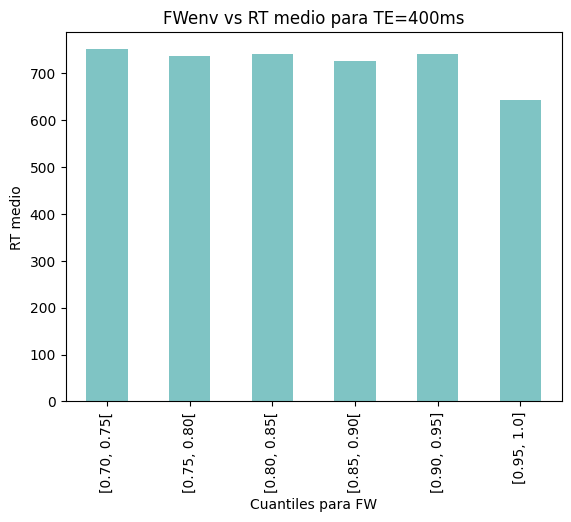

/tmp/ipykernel_76/989339531.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  p1 = data600.groupby("decilenvFW")["rt"].mean()


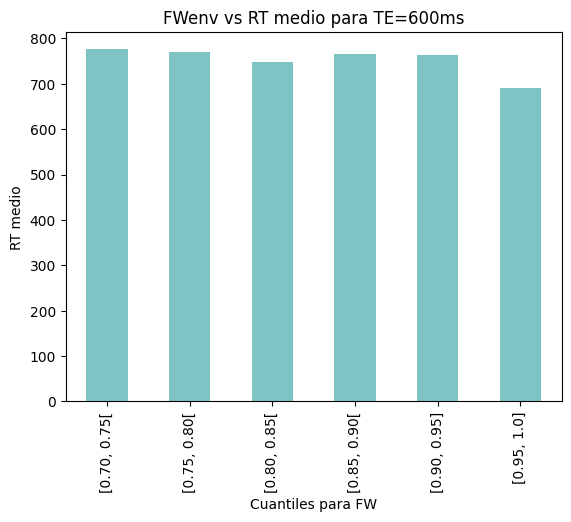

/tmp/ipykernel_76/989339531.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  p1 = data800.groupby("decilenvFW")["rt"].mean()


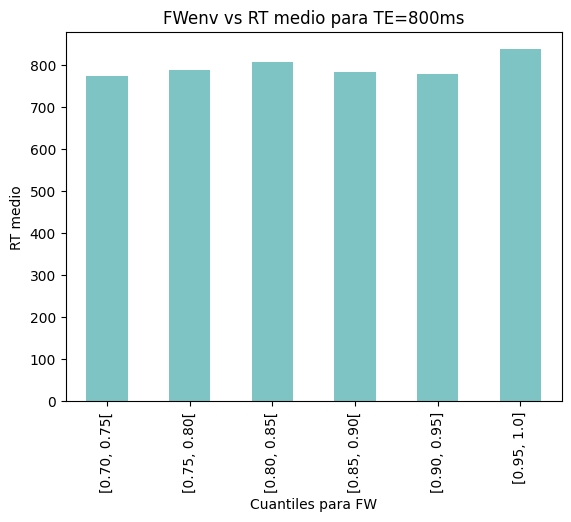

/tmp/ipykernel_76/989339531.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  p1 = data.groupby("decilenvFW")["rt"].mean()


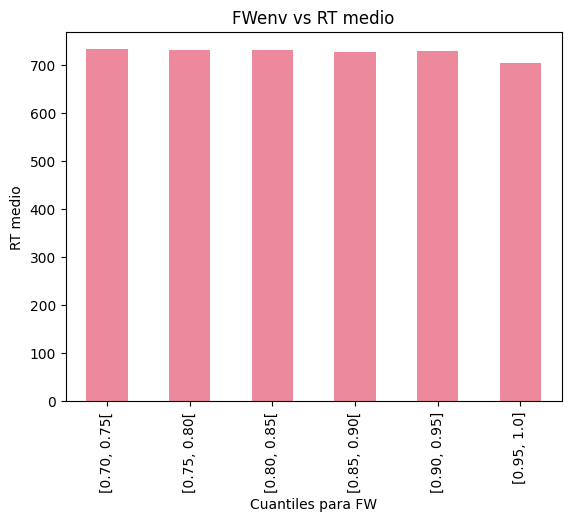

In [22]:
data100=data[(data["time"] == 100)]
p1 = data100.groupby("decilenvFW")["rt"].mean()
p1 = p1.dropna()
p1.plot(kind="bar", 
       alpha=0.5, 
       title="FWenv vs RT medio para TE=100ms",xlabel="Cuantiles para FW", ylabel="RT medio",color="darkcyan")
plt.show()

data200=data[(data["time"] == 200)]
p1 = data200.groupby("decilenvFW")["rt"].mean()
p1 = p1.dropna()
p1.plot(kind="bar", 
       alpha=0.5, 
       title="FWenv vs RT medio para TE=200ms",xlabel="Cuantiles para FW", ylabel="RT medio",color="darkcyan")
plt.show()
       
data400=data[(data["time"] == 400)]
p1 = data400.groupby("decilenvFW")["rt"].mean()
p1 = p1.dropna()
p1.plot(kind="bar", 
       alpha=0.5, 
       title="FWenv vs RT medio para TE=400ms",xlabel="Cuantiles para FW", ylabel="RT medio",color="darkcyan")
plt.show()

data600=data[(data["time"] == 600)]
p1 = data600.groupby("decilenvFW")["rt"].mean()
p1 = p1.dropna()
p1.plot(kind="bar", 
       alpha=0.5, 
       title="FWenv vs RT medio para TE=600ms",xlabel="Cuantiles para FW", ylabel="RT medio",color="darkcyan")
plt.show()

data800=data[(data["time"] == 800)]
p1 = data800.groupby("decilenvFW")["rt"].mean()
p1 = p1.dropna()
p1.plot(kind="bar", 
       alpha=0.5, 
       title="FWenv vs RT medio para TE=800ms",xlabel="Cuantiles para FW", ylabel="RT medio",color="darkcyan")
plt.show()

p1 = data.groupby("decilenvFW")["rt"].mean()
p1 = p1.dropna()
p1.plot(kind="bar", 
       alpha=0.5, 
       title="FWenv vs RT medio",xlabel="Cuantiles para FW", ylabel="RT medio",color="crimson")
plt.show()

### Los siguientes bloques de códigos son algunos análisis rápidos de los datos de los sujetos, esto fue hecho con el fin de compararlo con los resultados obtenidos por los modelos, esto explicado en el informe, los dejamos para mostrar ejemplo de uso.

In [23]:
data_limpia = pd.read_csv("datos_fila_limpios.csv")
data_limpia
# a=data_limpia.groupby("subj_idx")["response"].mean()
# a.sort_values()
# # d1 = data_limpia[data_limpia["subj_idx"]=="i17"]
# # d1["response"].mean()


,Unnamed: 0.1,Unnamed: 0,stim,subj_idx,trial,time,resp,rt,sesion,colAZ,...,envAZ,envAM,response,numFW,pixFW,envFW,decilnumFW,decilpixFW,decilenvFW,cuantRT
0,0,1,stim_mix_1_AM_AMmmAZ_AMmmAZ_AMmmAZ.png,i10,438,600,M,595,s4,AZ1,...,32324,40730,1.0,0.75,0.773073,0.793616,"[0.75, 0.80[","[0.75, 0.80[","[0.75, 0.80[","[500,600["
1,1,2,stim_mix_1_AM_AMmmAZ_AMmmAZ_AMmmAZ.png,i9,438,100,Z,874,s1,AZ1,...,32324,40730,0.0,0.75,0.773073,0.793616,"[0.75, 0.80[","[0.75, 0.80[","[0.75, 0.80[","[800,900["
2,2,3,stim_mix_1_AM_AMmmAZ_AMmmAZ_AMmmAZ.png,i14,68,600,M,750,s4,AZ1,...,32324,40730,1.0,0.75,0.773073,0.793616,"[0.75, 0.80[","[0.75, 0.80[","[0.75, 0.80[","[700,800["
3,3,4,stim_mix_1_AM_AMmmAZ_AMmmAZ_AMmmAZ.png,i10,68,100,M,487,s3,AZ1,...,32324,40730,1.0,0.75,0.773073,0.793616,"[0.75, 0.80[","[0.75, 0.80[","[0.75, 0.80[","[400,500["
4,4,5,stim_mix_1_AM_AMmmAZ_AMmmAZ_AMmmAZ.png,i7,334,800,M,1215,s4,AZ1,...,32324,40730,1.0,0.75,0.773073,0.793616,"[0.75, 0.80[","[0.75, 0.80[","[0.75, 0.80[","[1200,1300["
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35543,37453,37454,stim_mix_99_AM_AMmmAZ_AZmmAM_AMmmAZ.png,i21,149,800,M,1359,s2,AZ2,...,44515,55720,1.0,0.75,0.777721,0.798905,"[0.75, 0.80[","[0.75, 0.80[","[0.75, 0.80[","[1300,1400["
35544,37454,37455,stim_mix_99_AM_AMmmAZ_AZmmAM_AMmmAZ.png,i18,366,100,Z,793,s2,AZ2,...,44515,55720,0.0,0.75,0.777721,0.798905,"[0.75, 0.80[","[0.75, 0.80[","[0.75, 0.80[","[700,800["
35545,37455,37456,stim_mix_99_AM_AMmmAZ_AZmmAM_AMmmAZ.png,i10,365,800,M,667,s4,AZ2,...,44515,55720,1.0,0.75,0.777721,0.798905,"[0.75, 0.80[","[0.75, 0.80[","[0.75, 0.80[","[600,700["
35546,37456,37457,stim_mix_99_AM_AMmmAZ_AZmmAM_AMmmAZ.png,i15,364,400,M,524,s2,AZ2,...,44515,55720,1.0,0.75,0.777721,0.798905,"[0.75, 0.80[","[0.75, 0.80[","[0.75, 0.80[","[500,600["


In [24]:
data.groupby("subj_idx")["rt"].mean()

subj_idx
i1      622.812950
i10     702.157868
i11     716.598413
i12     667.040159
i13     591.954365
i14     784.392762
i15     873.355199
i16     833.980163
i17     384.629276
i18     646.942308
i19     788.170472
i2      872.125960
i20     834.307154
i21    1007.086885
i3      789.942308
i4      886.494388
i6      542.053207
i7      651.162663
i8      442.917944
i9      857.491181
Name: rt, dtype: float64

In [25]:
a = data.groupby("subj_idx")["rt"].mean()
a.sort_values()

subj_idx
i17     384.629276
i8      442.917944
i6      542.053207
i13     591.954365
i1      622.812950
i18     646.942308
i7      651.162663
i12     667.040159
i10     702.157868
i11     716.598413
i14     784.392762
i19     788.170472
i3      789.942308
i16     833.980163
i20     834.307154
i9      857.491181
i2      872.125960
i15     873.355199
i4      886.494388
i21    1007.086885
Name: rt, dtype: float64

In [26]:
data1 = data[data["rt"]<=1100]
a1 = data1.groupby("time")["rt"].mean()
data1 = data[data["rt"]<=1200]
a2 = data1.groupby("time")["rt"].mean()
data1 = data[data["rt"]<=1400]
a3 = data1.groupby("time")["rt"].mean()
data1 = data[data["rt"]<=1600]
a4 = data1.groupby("time")["rt"].mean()
data1 = data[data["rt"]<=1800]
a5 = data1.groupby("time")["rt"].mean()
print(a1,a2,a3,a4,a5)


time
100    659.530799
200    674.101940
400    681.627460
600    678.078561
800    666.595159
Name: rt, dtype: float64 time
100    659.595845
200    691.635959
400    704.337622
600    706.541143
800    697.995164
Name: rt, dtype: float64 time
100    659.595845
200    691.635959
400    732.277244
600    745.411648
800    741.738119
Name: rt, dtype: float64 time
100    659.595845
200    691.635959
400    732.277244
600    765.682887
800    772.354155
Name: rt, dtype: float64 time
100    659.595845
200    691.635959
400    732.277244
600    765.682887
800    787.652730
Name: rt, dtype: float64
